# **Data Cleaning and EDA(Exploratory Data Analysis) on the Titanic dataset**

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [123]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. Data Cleaning**


**loading the dataset and inpecting its nature**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
df.shape

(891, 12)

**Handling the missing values**



In [126]:
#Number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Since the 'Cabin' column has over half of its values missing, it is reasonable to drop this column.
- The missing values in the 'Age' column and 'Embarked' column are filled using the median and mode, respectively.

In [127]:
df.drop("Cabin", axis=1, inplace=True, errors='ignore')
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\utkar\AppData\Local\Temp\ipykernel_18036\3359236763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\utkar\AppData\Local\Temp\ipykernel_18036\3359236763.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### **Duplicates handling**

In [128]:
# Number of duplicate rows 
df.duplicated().sum()

np.int64(0)

No duplicate rows in the dataset

#### **Outlier Detection and Handling**






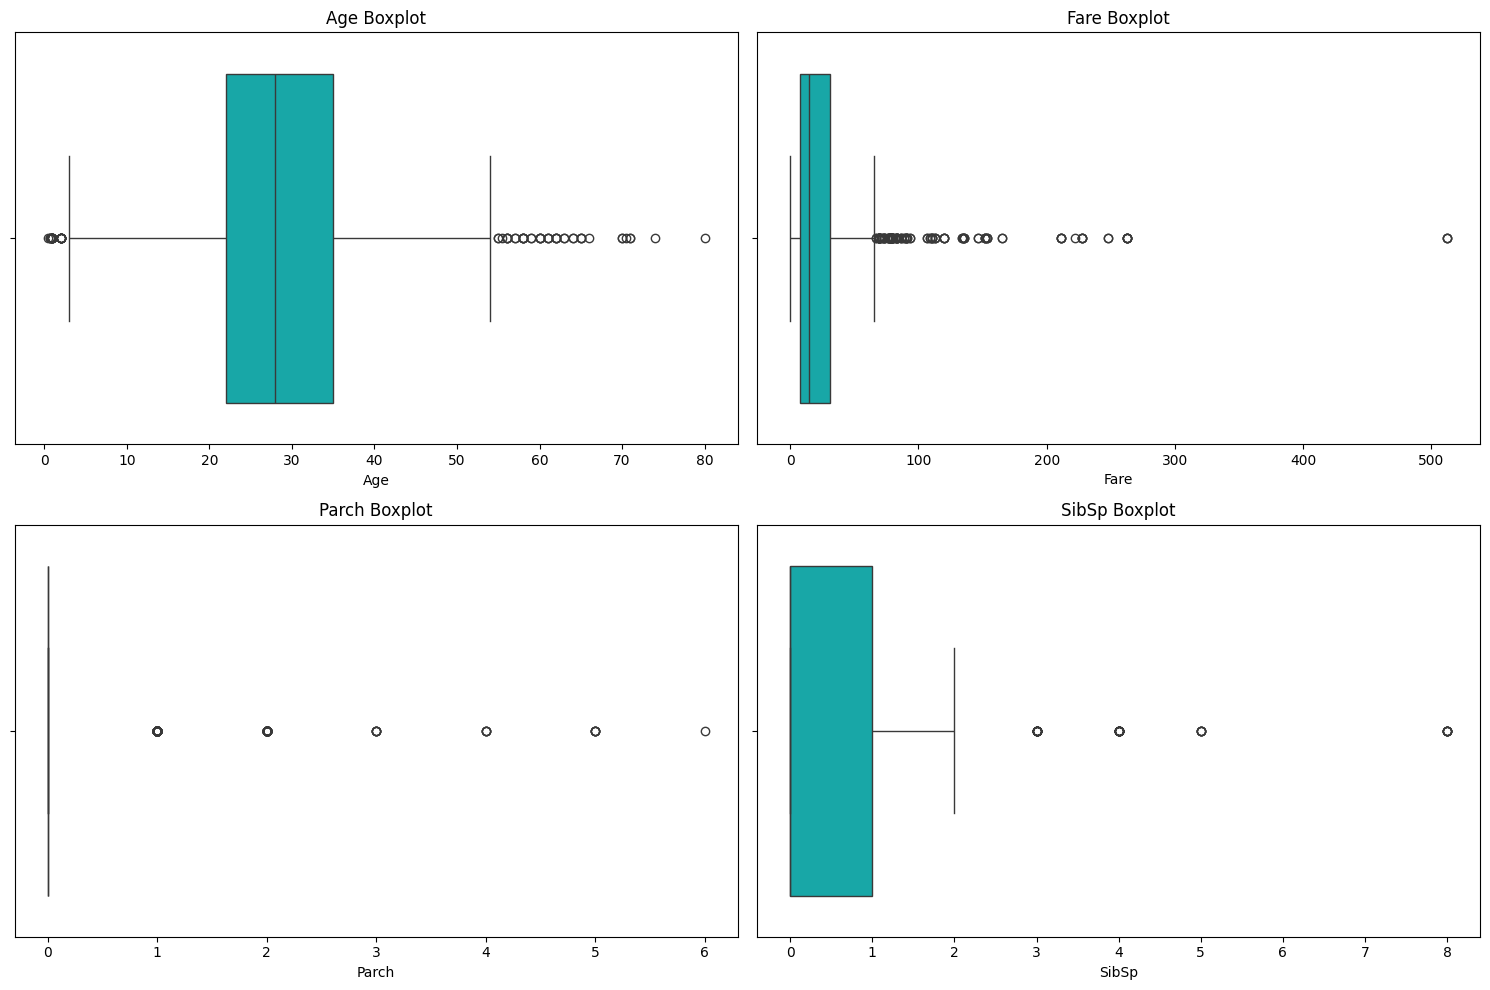

In [129]:
numerical_columns = ["Age", "Fare", "Parch", "SibSp"]
categorical_columns = ["Survived", "Pclass", "Sex", "Embarked"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) + 1) // 2, i)
    sns.boxplot(x=df[col], color='c')
    plt.title(f"{col} Boxplot")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

- The box plots show that there are many outliers in the Age and Fare column

**Handling outliers:**


In [130]:
print(f"Skewness of \"Age\" : {df['Age'].skew()}")
print(f"Skewness of \"Fare\" : {df['Fare'].skew()}")

Skewness of "Age" : 0.5102446555756495
Skewness of "Fare" : 4.787316519674893


- The skewness of "Age" is small, so we will use Z-score method to remove the outliers.
- The skewness of "Fare" is large, so we will have to use the IQR method to remove the outliers.

- **IQR Method** 

In [131]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Number of outliers for \"Fare\" with IQR method = {df[(df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)].shape[0]}")
df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]


Number of outliers for "Fare" with IQR method = 116


- **Z score method**

In [132]:
from scipy import stats

df["Z_Score"] = abs(stats.zscore(df["Age"]))
print(f"Number of outliers in \"Age\" with Z-score method = {df[df["Z_Score"] >= 3].shape[0]}")
df = df[df["Z_Score"] < 3]
df.drop(columns=["Z_Score"], inplace=True)
df

Number of outliers in "Age" with Z-score method = 6


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Standardize the categorical value**

- Drop the columns "Name", "Ticket", "PassengerID which have no relation with our output(here, Survived column)

In [133]:
df.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)
df['Sex'] = df['Sex'].str.lower().str.strip()
df['Embarked'] = df['Embarked'].str.upper().str.strip()

# **2. Univariate Analysis**

**Statistical Analysis**

In [134]:
stats = df[numerical_columns].describe().T
stats["mode"] = df[numerical_columns].mode().T[0]
stats["skew"] = df[numerical_columns].skew()
stats["variance"] = df[numerical_columns].var()
stats.T.round(6)

,Age,Fare,Parch,SibSp
count,769.000000,769.000000,769.000000,769.000000
mean,28.405397,17.778852,0.343303,0.440832
std,12.219669,13.549928,0.788399,0.902512
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000
50%,28.000000,13.000000,0.000000,0.000000
75%,34.000000,26.000000,0.000000,1.000000
max,66.000000,65.000000,6.000000,5.000000
mode,28.000000,8.050000,0.000000,0.000000
skew,0.309475,1.441620,3.130821,2.777141


**Frequency distribution for categorical columns**

Frequency distribution for Survived:

Survived
0    507
1    262
Name: count, dtype: int64


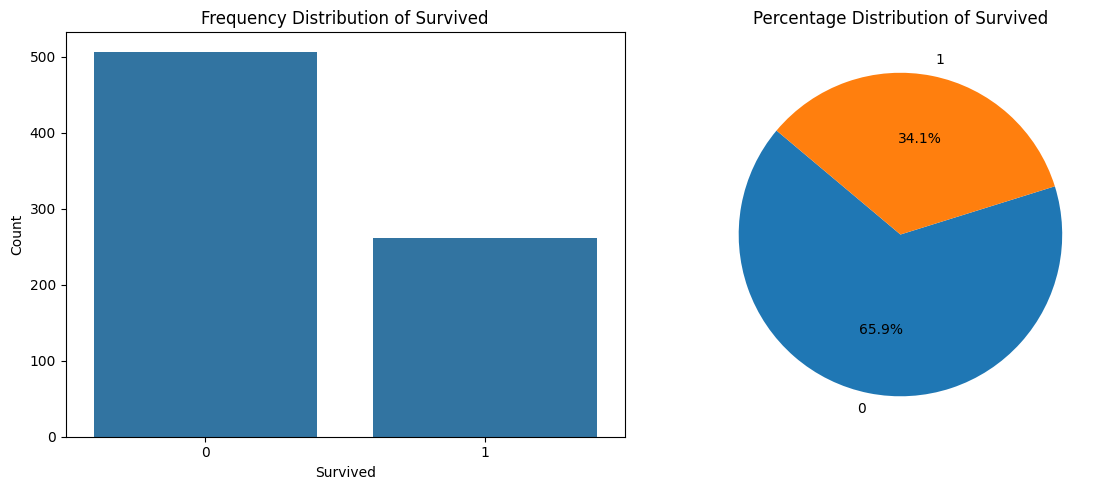

Frequency distribution for Pclass:

Pclass
3    482
2    178
1    109
Name: count, dtype: int64


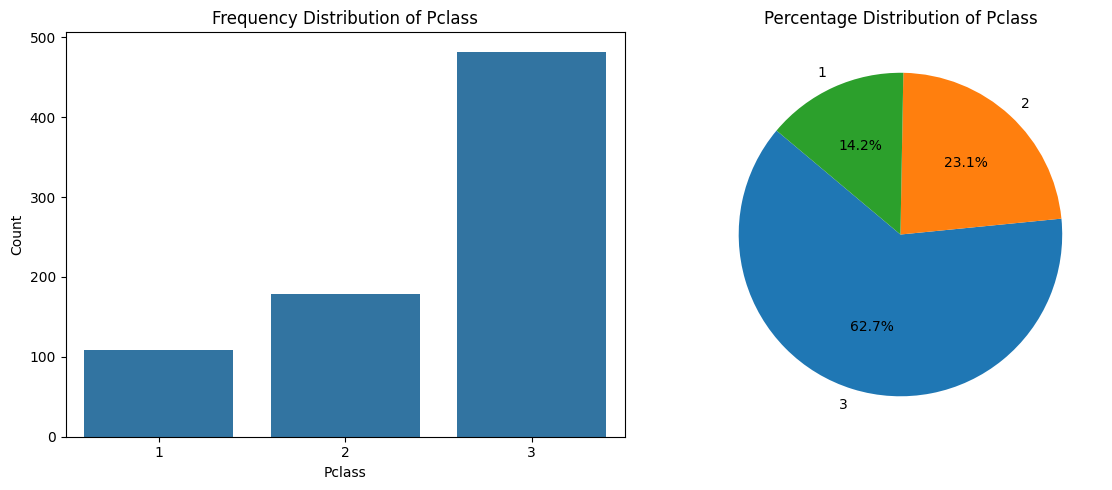

Frequency distribution for Sex:

Sex
male      525
female    244
Name: count, dtype: int64


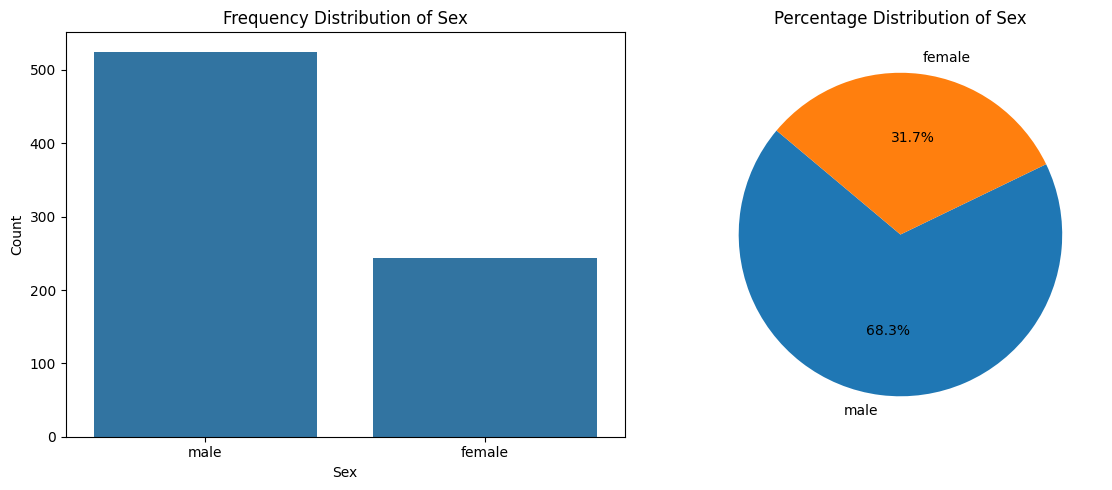

Frequency distribution for Embarked:

Embarked
S    581
C    114
Q     74
Name: count, dtype: int64


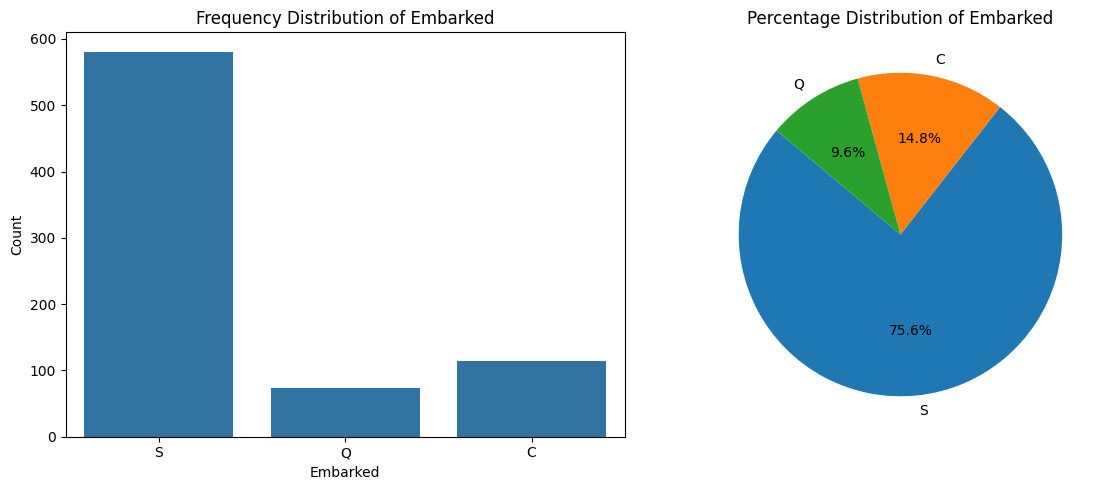

In [135]:
for col in categorical_columns:
    print(f"Frequency distribution for {col}:\n")
    print(df[col].value_counts())
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Count Plot (Bar Chart)
    sns.countplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"Frequency Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    # Pie Chart
    axes[1].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct="%1.1f%%", startangle=140)
    axes[1].set_title(f"Percentage Distribution of {col}")

    plt.tight_layout()
    plt.show()


- The number of passengers who perished was higher than those who survived.
- A majority of Titanic passengers traveled in 3rd class, suggesting a larger proportion of commoners.
- Around 68% of the passengers on board were male.
- Most passengers began their journey from Southampton.

**Histogram for numerical columns**

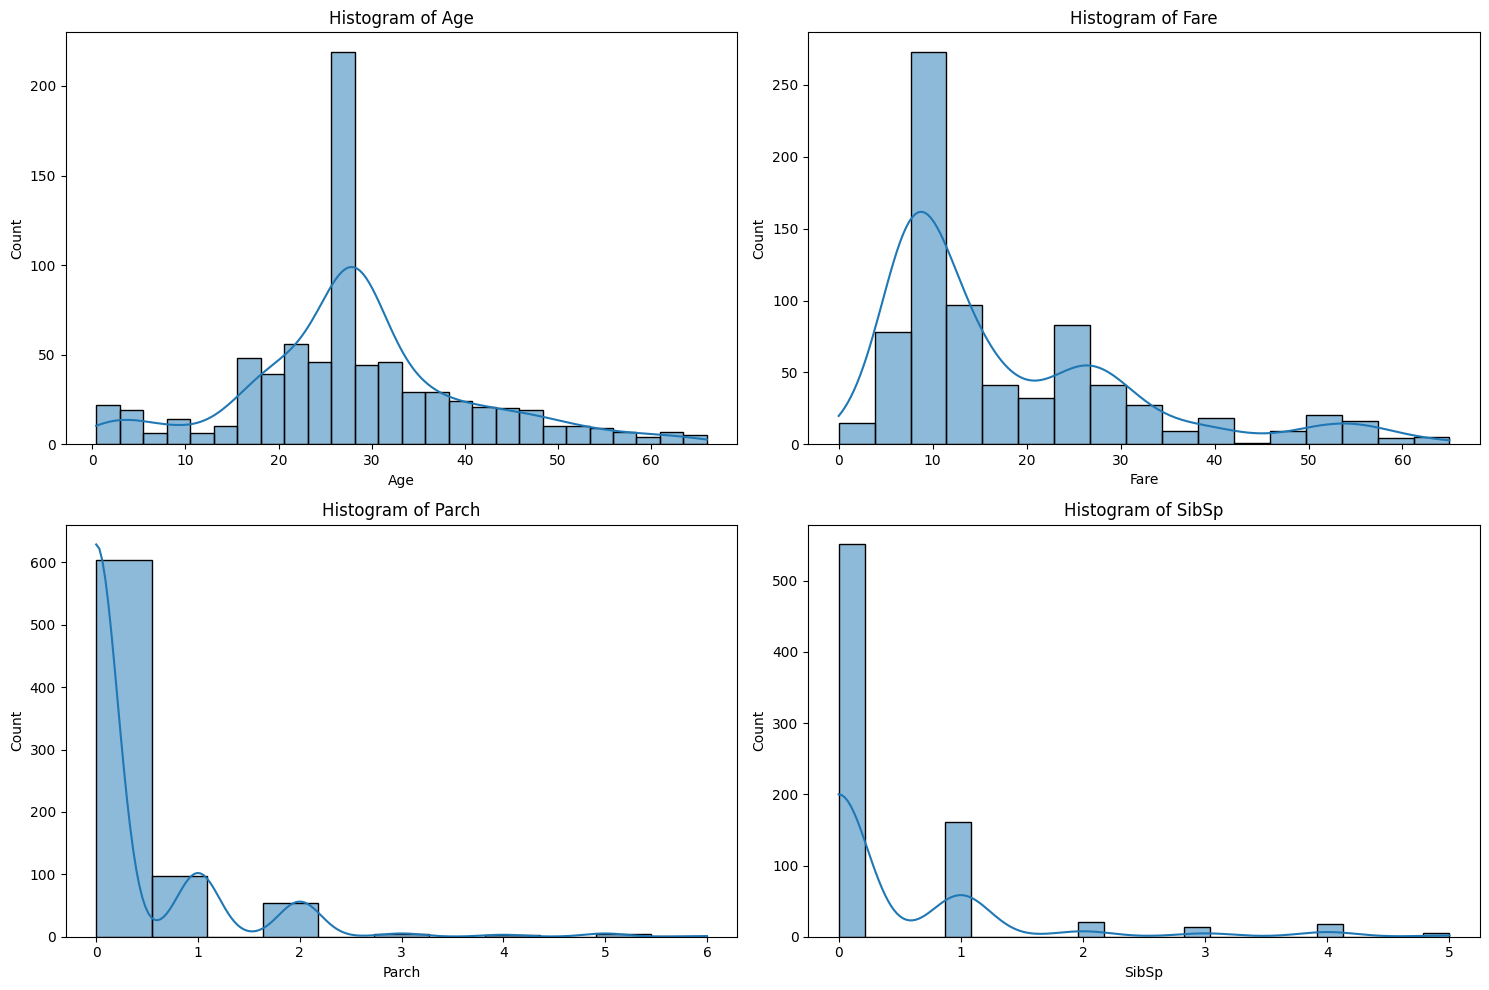

In [136]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) + 1) // 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### 1. Age Distribution  
- The age distribution is right-skewed, with most passengers falling between 20 and 40 years old.
- A smaller peak for children suggests the presence of younger passengers on board.
- Passengers above 60 years old are very few, suggesting that older individuals were a minority.

### 2. Fare Distribution  
- The fare distribution is highly right-skewed, with most passengers paying relatively low fares.
- A few passengers paid exceptionally high fares, likely belonging to first-class.

### 3. SibSp (Siblings/Spouses Aboard)  
- The majority of passengers traveled alone or with just one companion (SibSp = 0 or 1).
- Very few had multiple siblings or spouses onboard.
- The trend indicates that solo travelers were quite common on the Titanic.

### 4. Parch (Parents/Children Aboard)  
- Most passengers did not have parents or children with them (Parch = 0).
- A smaller peak appears for those traveling with one or two family members.
- Traveling with large families was uncommon, suggesting that multi-generational travel was rare.

**Box plots for numerical columns**

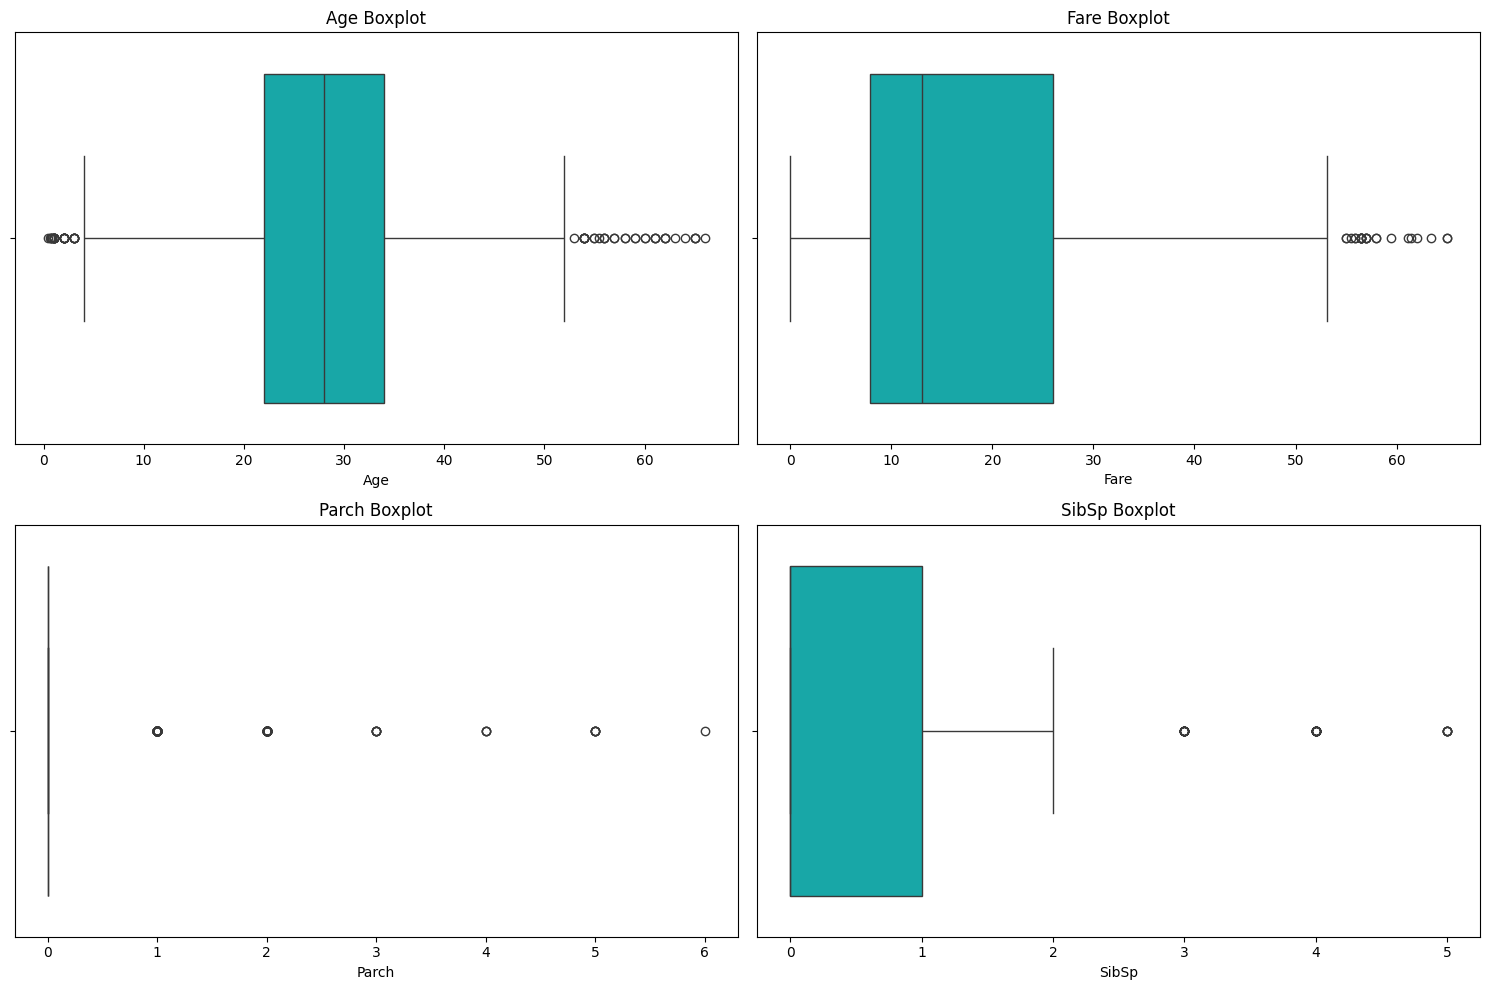

In [137]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) + 1) // 2, i)
    sns.boxplot(x=df[col], color='c')
    plt.title(f"{col} Boxplot")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# **3. Bivariate Analysis**


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.240775 -0.115591 -0.004557  0.097698  0.236344
Pclass   -0.240775  1.000000 -0.344623  0.111690  0.081248 -0.585860
Age      -0.115591 -0.344623  1.000000 -0.338370 -0.202320  0.078689
SibSp    -0.004557  0.111690 -0.338370  1.000000  0.409214  0.374510
Parch     0.097698  0.081248 -0.202320  0.409214  1.000000  0.340501
Fare      0.236344 -0.585860  0.078689  0.374510  0.340501  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

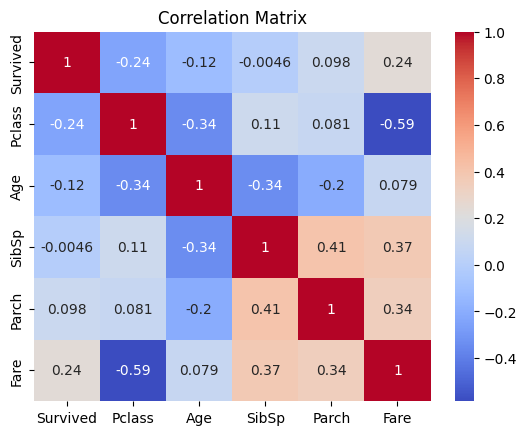

In [138]:
correlation_matrix = df.corr(numeric_only=True)

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

### 1. Fare vs. Pclass (Strong Negative Correlation)  
- First-class passengers (Pclass = 1) paid significantly higher fares, while third-class passengers (Pclass = 3) paid the lowest.
- This strong negative correlation highlights fare as a key factor distinguishing passenger classes.

### 2. Age vs. SibSp/Parch (Weak Negative Correlation)  
- Younger passengers were more likely to travel with family (higher SibSp/Parch values), whereas older passengers were more likely to travel alone.
- This indicates that families with children were more common, while older individuals, particularly in first class, often traveled solo.

### 3. SibSp vs. Parch (Positive Correlation)  
- Passengers with siblings/spouses onboard were also likely to have parents/children traveling with them.
- This suggests that many families traveled in groups rather than individually.

### 4. Fare vs. SibSp/Parch (Weak Positive Correlation)  
- Larger families (higher SibSp/Parch values) tended to pay slightly higher fares, possibly due to purchasing multiple tickets.
- However, the correlation remains weak, as family size does not necessarily determine fare class.

### 5. Survived vs. Pclass (Negative Correlation)  
- Higher-class passengers had a greater chance of survival, reinforcing that first-class passengers were prioritized during evacuation.
- Third-class passengers had lower survival rates, further indicating the influence of social status on survival.

### 6. Survived vs. Fare (Positive Correlation)  
- Higher fares were associated with better survival rates, suggesting that wealthier passengers had an advantage in securing safety.

### 7. Survived vs. Age (Weak Negative Correlation)  
- Older passengers had a slightly lower survival rate, but the correlation was weak.
- This suggests that age alone was not a primary determinant of survival but may have interacted with factors such as class and gender.

---

**Numerical v/s Numerical analysis**

**Scatter-plots**

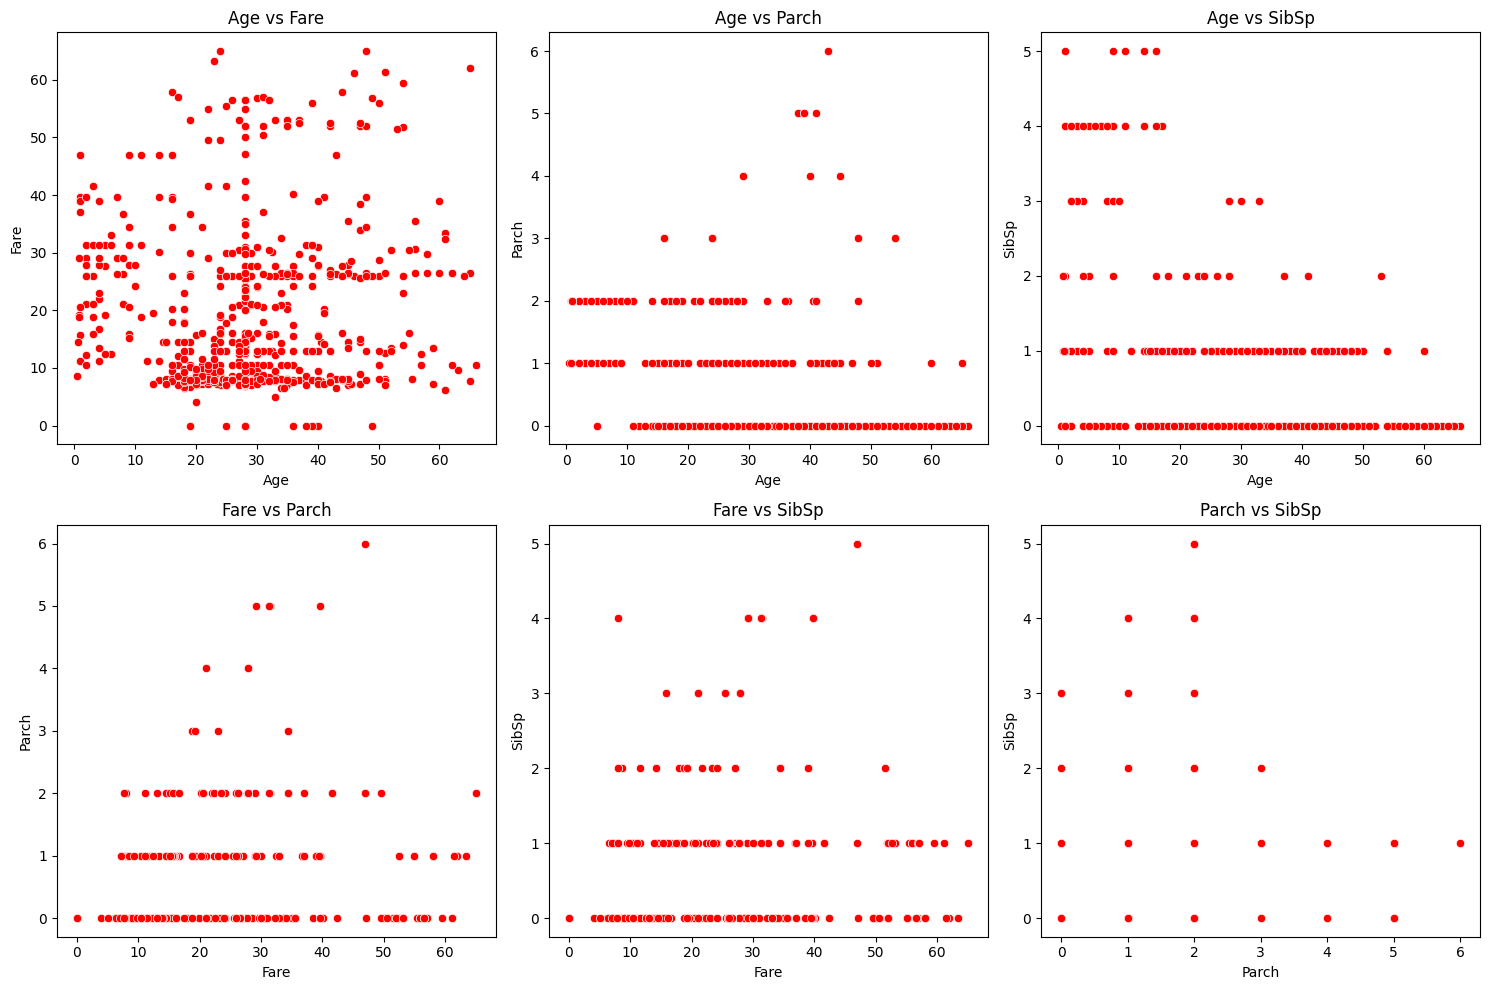

In [139]:
plt.figure(figsize=(15, 10))
c = len(numerical_columns) * (len(numerical_columns) - 1) // 2
p = 1
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.subplot(2, (c + 1) // 2, p)
        sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], color='r')
        p += 1
        plt.title(f"{numerical_columns[i]} vs {numerical_columns[j]}")
        # plt.show()
        
plt.tight_layout()
plt.show()

### 1. Age vs. Fare  
- Older passengers generally paid higher fares, likely indicating wealthier individuals traveling in first class.
- Younger passengers were mostly in the lower fare range, suggesting they were in third class.

### 2. Age vs. SibSp  
- Most passengers, regardless of age, had few (0-2) siblings or spouses aboard.
- Younger passengers, especially children, had higher SibSp values, suggesting they were more likely to travel with family.
- Older passengers, particularly those above 50, mostly traveled alone.

### 3. Age vs. Parch  
- Children (age < 10) often had nonzero Parch values, indicating they were traveling with parents.
- Most adults had Parch = 0, meaning they were not traveling with parents or children.
- Some older passengers had Parch values greater than 1, suggesting they were traveling with their children.

### 4. Fare vs. SibSp  
- Higher fares were generally associated with fewer siblings/spouses onboard, indicating that wealthier passengers often traveled alone or in smaller groups.

### 5. Fare vs. Parch  
- Higher fares were linked with fewer parents/children traveling together.
- Larger families tended to pay lower fares, reinforcing that they were mostly third-class passengers.
- Some high-fare passengers had at least one parent or child traveling with them.

### 6. SibSp vs. Parch  
- Passengers with siblings/spouses onboard were often accompanied by parents or children as well.
- Some passengers had both SibSp and Parch equal to zero, indicating they were traveling alone.
- Very few passengers had high SibSp and Parch values, suggesting large family groups were uncommon.


---

**Numerical-categorical**

**Box-plots**


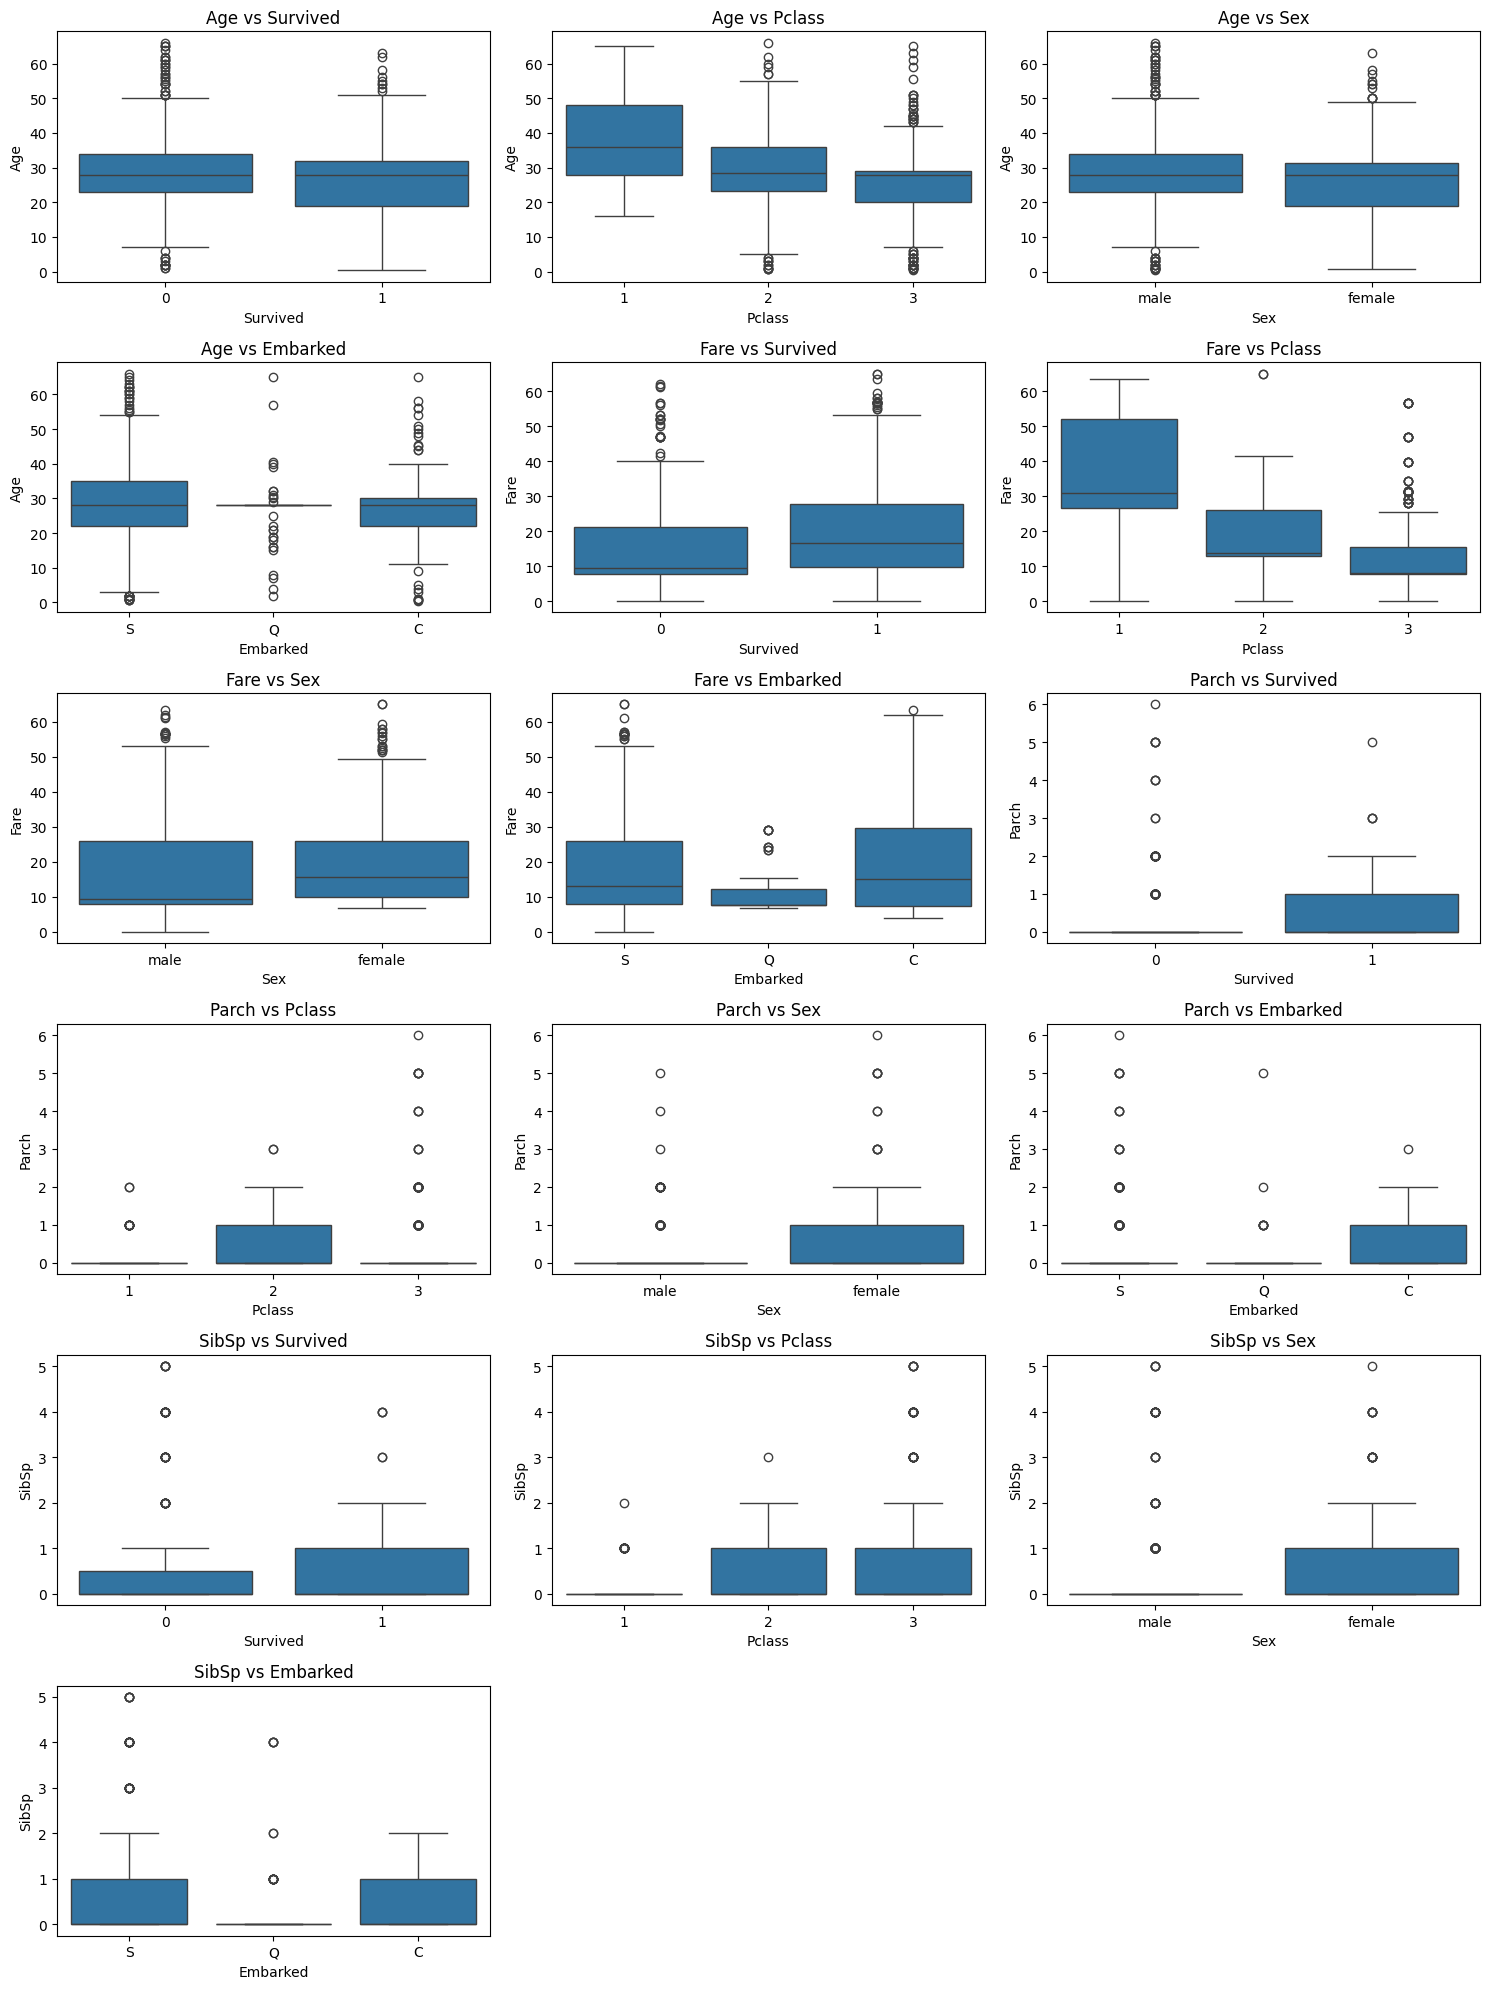

In [140]:
plt.figure(figsize=(15, 20))
c = len(numerical_columns) * len(categorical_columns)
p = 1
for i in numerical_columns:
    for j in categorical_columns:
        plt.subplot((c + 2) // 3, 3, p)
        sns.boxplot(x=df[j], y=df[i])
        p += 1
        plt.title(f"{i} vs {j}")

plt.tight_layout()
plt.show()

**Barplot**


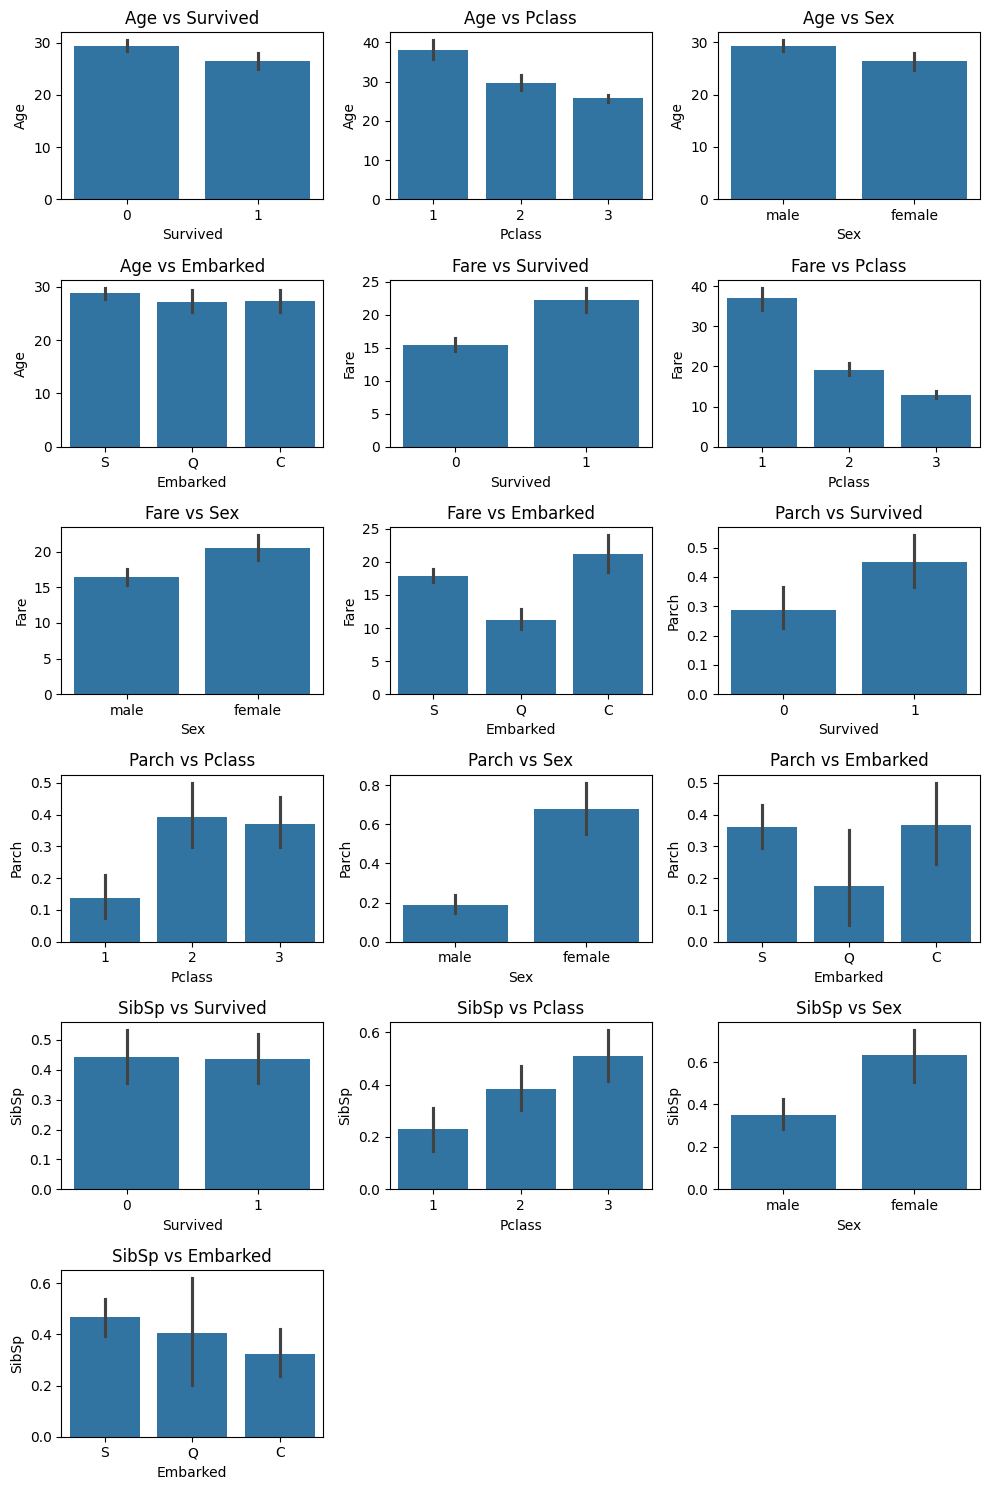

In [141]:
plt.figure(figsize=(10, 15))
c = len(numerical_columns) * len(categorical_columns)
p = 1
for i in numerical_columns:
    for j in categorical_columns:
        plt.subplot((c + 2) // 3, 3, p)
        sns.barplot(x=df[j], y=df[i])
        p += 1
        plt.title(f"{i} vs {j}")

plt.tight_layout()
plt.show()

**Violetplot**

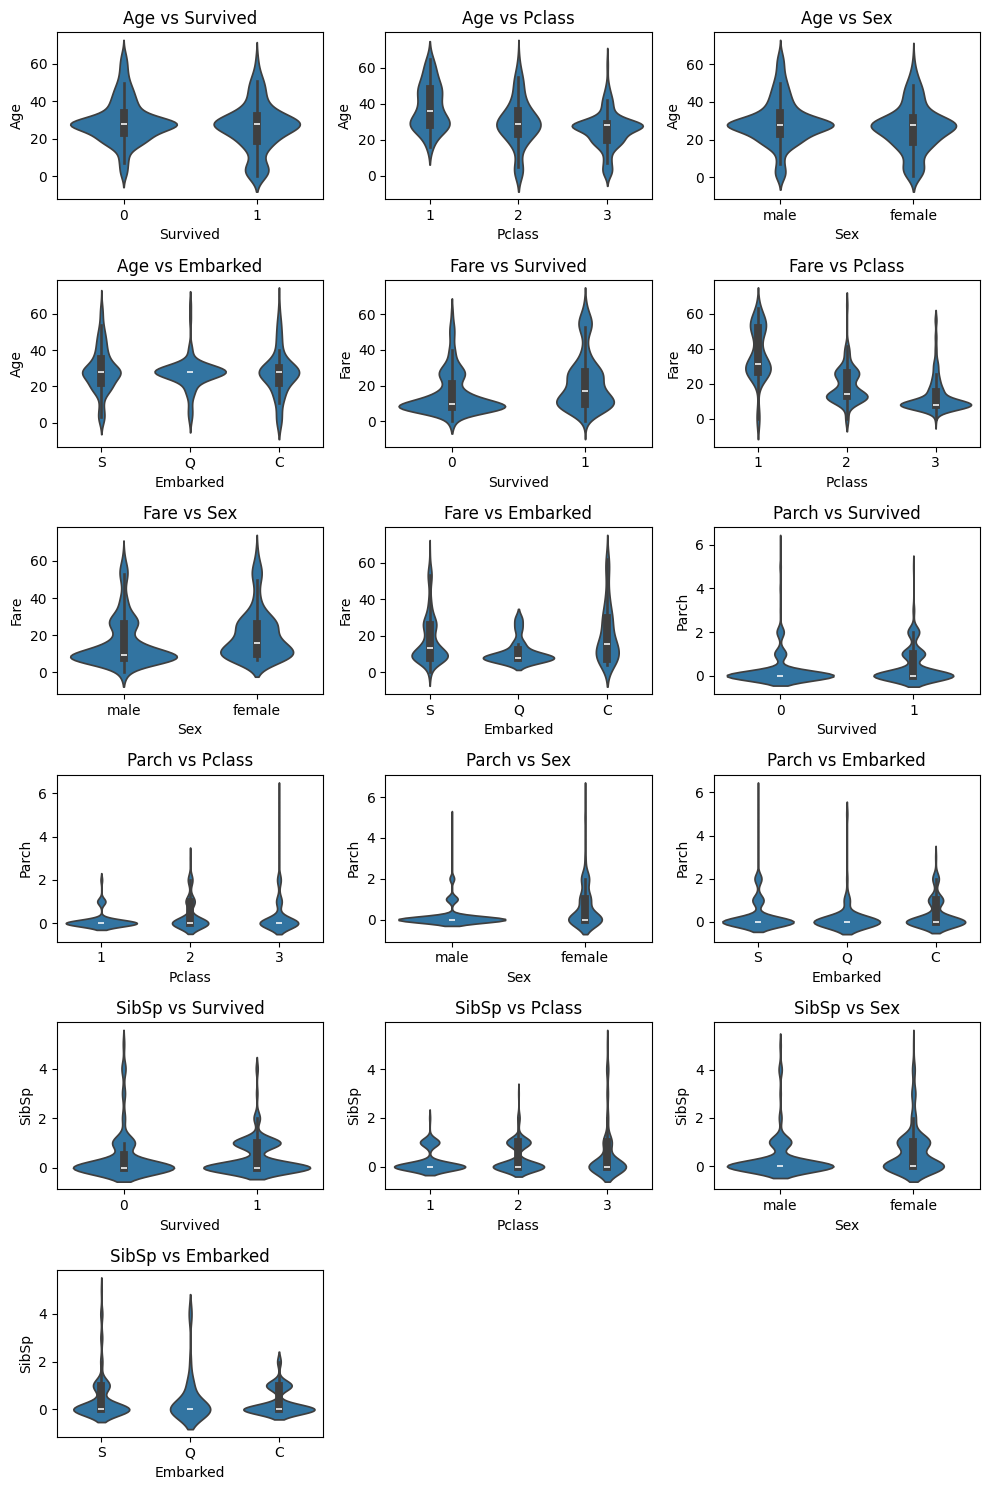

In [142]:
plt.figure(figsize=(10, 15))
c = len(numerical_columns) * len(categorical_columns)
p = 1
for i in numerical_columns:
    for j in categorical_columns:
        plt.subplot((c + 2) // 3, 3, p)
        sns.violinplot(x=j, y=i, data=df)
        p += 1
        plt.title(f"{i} vs {j}")

plt.tight_layout()
plt.show()

### Survived vs. Numerical Features

- Age: Younger passengers, especially children, had a higher survival rate compared to older ones, indicating they were prioritized during evacuation.
- Fare: Survivors generally paid higher fares, suggesting that first-class passengers had a better chance of survival.
- SibSp & Parch: Passengers traveling with 1-3 family members had a higher survival rate, whereas those traveling alone or with large families had lower survival chances.


### Pclass vs. Numerical Features:

- Age: First-class passengers were generally older than those in third class.
- Fare: As expected, first-class passengers paid the highest fares, while third-class passengers paid the least.
- SibSp & Parch: Third-class passengers were more likely to travel with larger families, while first-class passengers often traveled alone or with just one companion.


### Embarked vs. Numerical Features:

- Age: The age distribution varied among passengers boarding from different embarkation points.
- Fare: Passengers who embarked from ‘C’ (Cherbourg) had the highest fares, likely due to a larger number of first-class travelers boarding there.


### Sex vs. Numerical Features:

- Age: The age distribution for males and females was similar.
- Fare: On average, women paid slightly higher fares, possibly because more of them traveled in first and second class.
- SibSp & Parch: Women had slightly higher SibSp and Parch values, indicating they were more likely to travel with family compared to men.


---

**Categorical-Categorical**

Crosstab and Heatmap

Pclass     1   2    3
Survived             
0         53  91  363
1         56  87  119


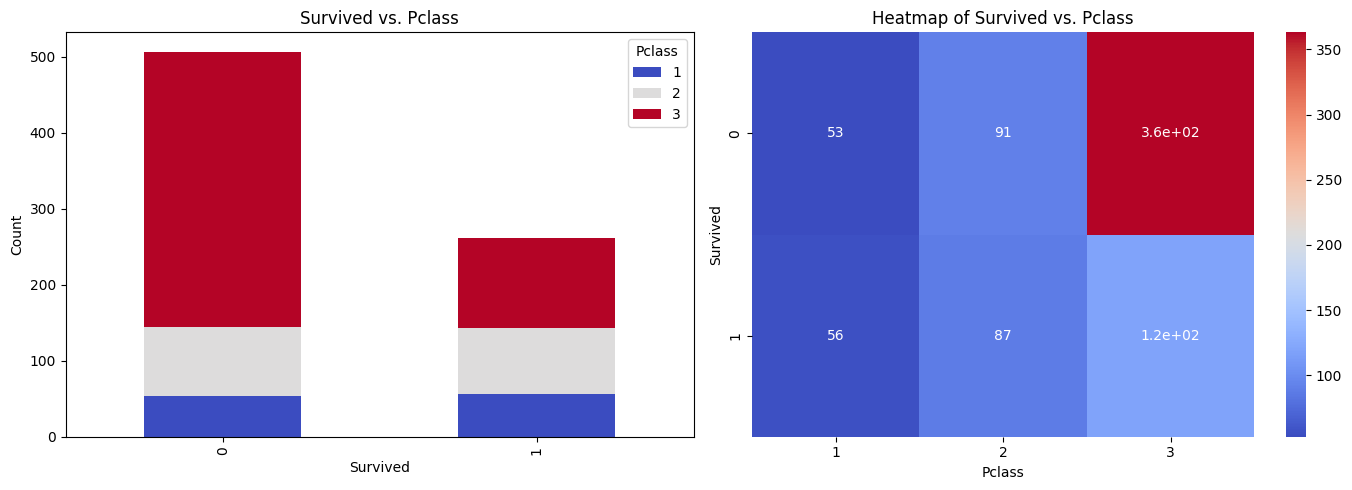

Sex       female  male
Survived              
0             76   431
1            168    94


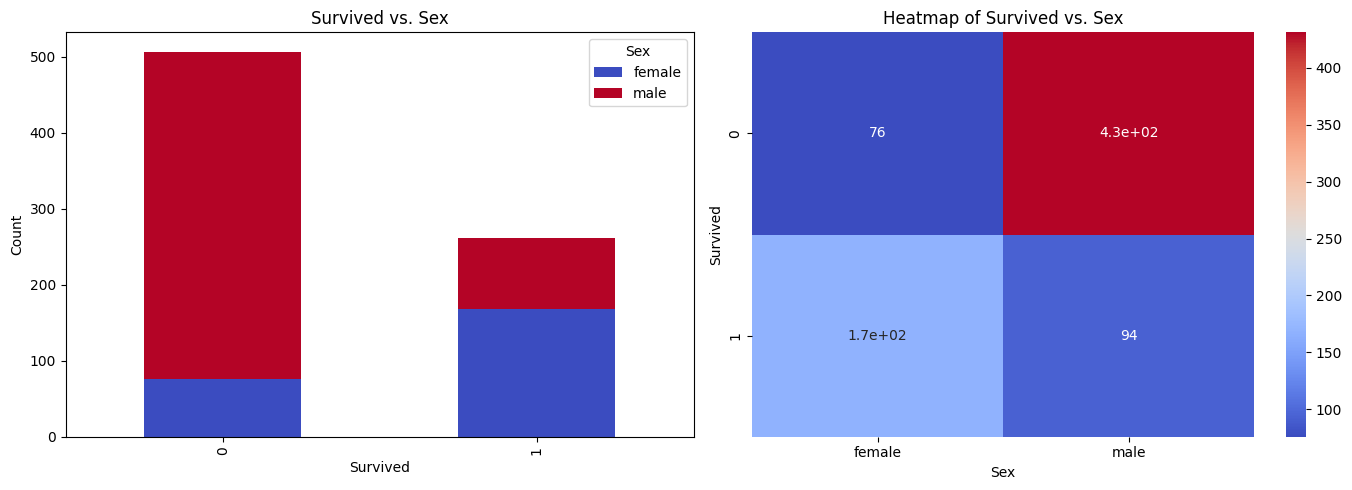

Embarked   C   Q    S
Survived             
0         62  45  400
1         52  29  181


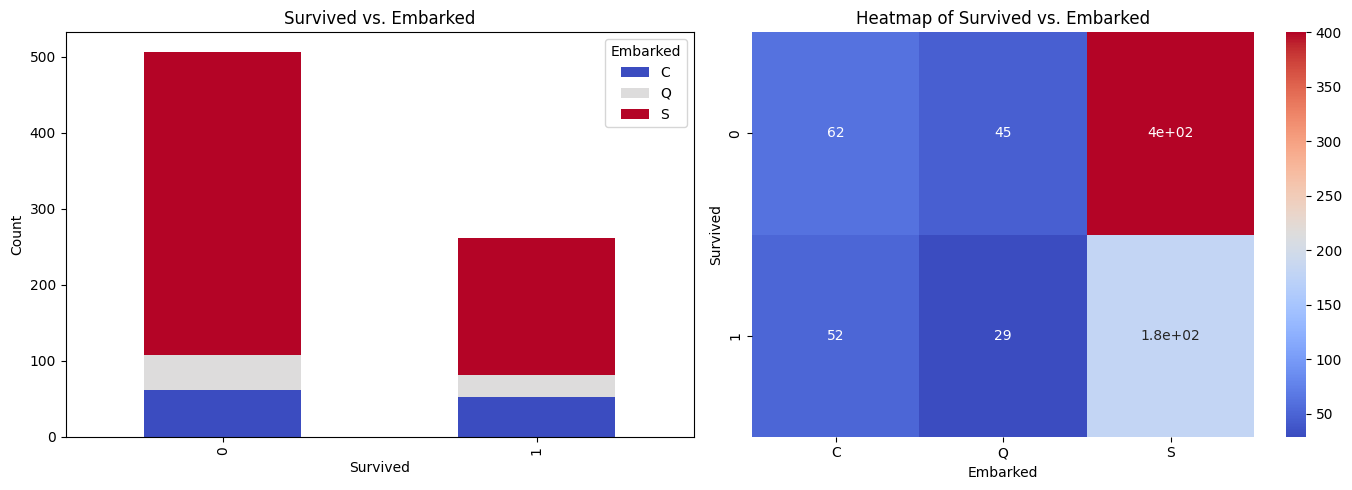

Sex     female  male
Pclass              
1           27    82
2           76   102
3          141   341


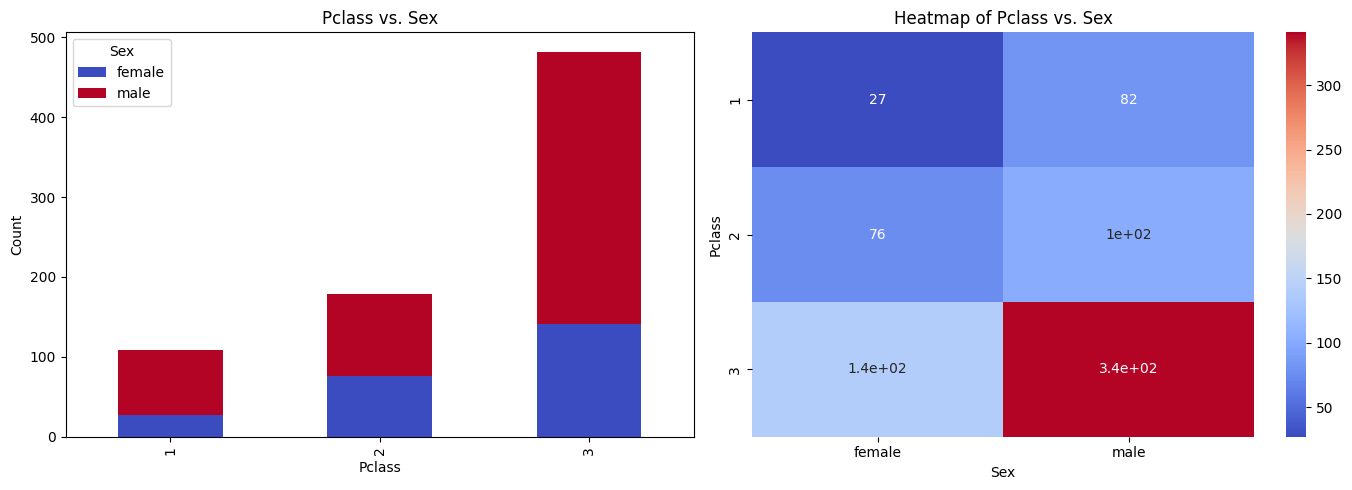

Embarked   C   Q    S
Pclass               
1         31   0   78
2         17   3  158
3         66  71  345


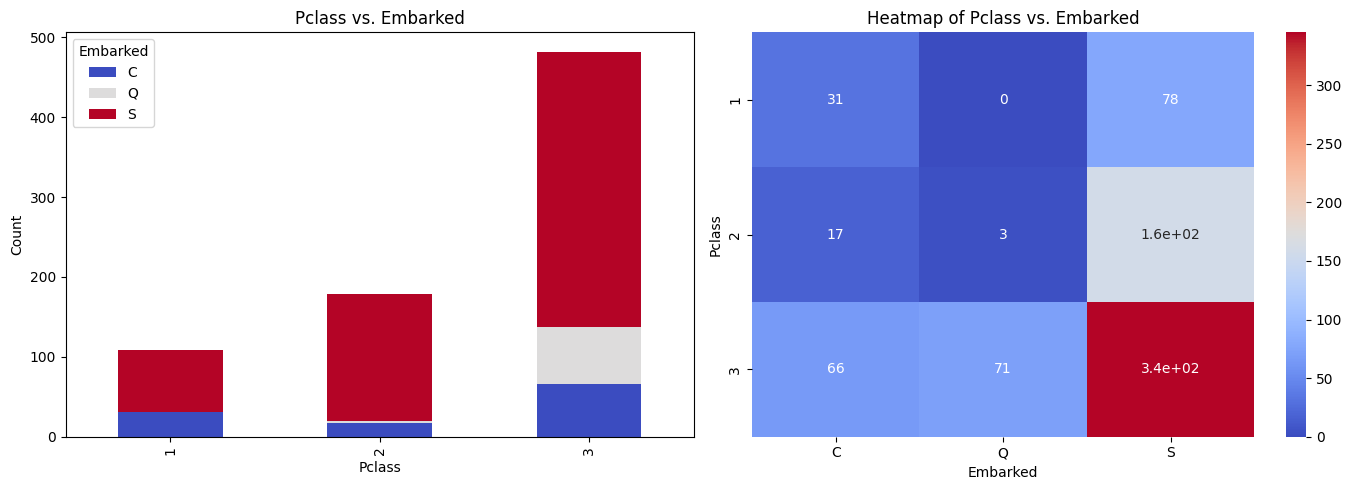

Embarked   C   Q    S
Sex                  
female    40  35  169
male      74  39  412


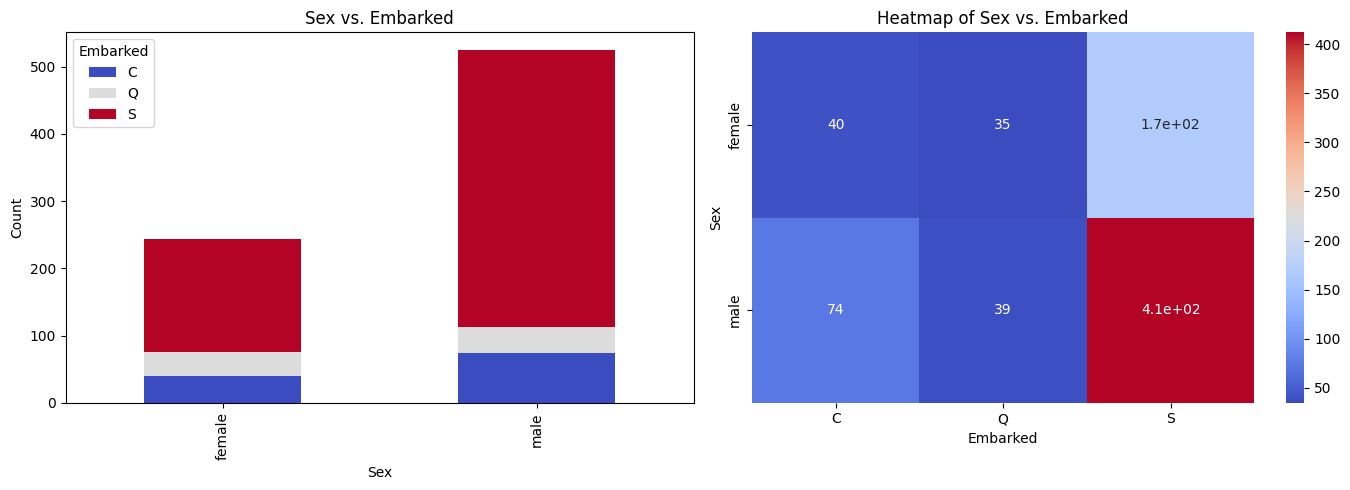

In [143]:
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        ct = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        print(ct)
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        ct.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[0])
        axes[0].set_title(f"{categorical_columns[i]} vs. {categorical_columns[j]}")
        axes[0].set_xlabel(categorical_columns[i])
        axes[0].set_ylabel("Count")
        axes[0].legend(title=categorical_columns[j])

        sns.heatmap(ct, annot=True, cmap="coolwarm", ax=axes[1])
        axes[1].set_title(f"Heatmap of {categorical_columns[i]} vs. {categorical_columns[j]}")

        plt.tight_layout()
        plt.show()

### Survived vs. Pclass
- First-class had the highest survival rate, while third-class had the lowest.  
- The majority of third-class passengers did not survive, indicating that wealth/status played a role in survival.  


### Survived vs. Sex  
- Significantly higher survival rate for females than males.  


### Survived vs. Embarked 
- Highest survival rate for passengers embarking from Cherbourg (‘C’).  
- Southampton (‘S’) had the lowest survival rate.


### Pclass vs. Embarked  
- Cherbourg (‘C’) had the highest proportion of first-class passengers, while Southampton (‘S’) had more third-class passengers.  


### Pclass vs. Sex 
- More males the third class, whereas females were more linearly distributed across classes.


---

# **4. Multivariate analysis**

### **Pairplot (Survived as hue)**

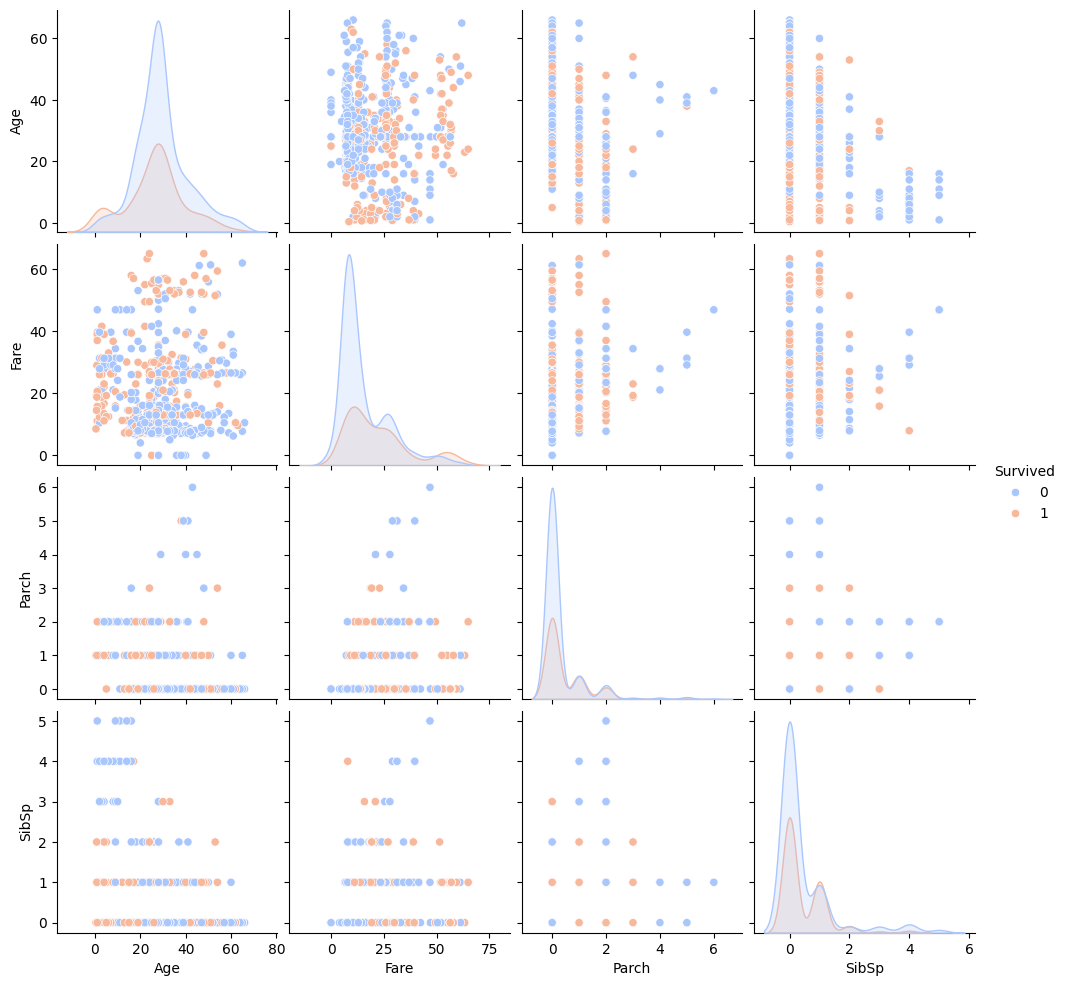

In [144]:
sns.pairplot(df, vars=numerical_columns, hue="Survived", palette="coolwarm")
plt.show()



### 1. Age vs. Fare  
- Survivors (hue) tend to cluster around higher fares, especially for older passengers.  
- Many non-survivors are in the low-fare region, indicating that third-class passengers had a lower survival rate.  

### 2. Age vs. SibSp & Age vs. Parch
- Younger passengers (especially children) had higher survival rates.  
- Most older passengers, especially those traveling alone (low SibSp/Parch), did not survive.  

### 3. Fare vs. SibSp & Fare vs. Parch 
- Higher fares are associated with lower family sizes (SibSp & Parch), indicating that first-class passengers often traveled alone or with fewer family members.  
- Lower fares correspond to larger family sizes.  

### 4. SibSp vs. Parch 
- Strong positive correlation: Passengers with siblings/spouses onboard often had parents/children as well.  
- Small family sizes (1-3 members) had higher survival rates, while large families (4+) had lower survival rates. 



---


## **Pairplot (Pclass as hue)**

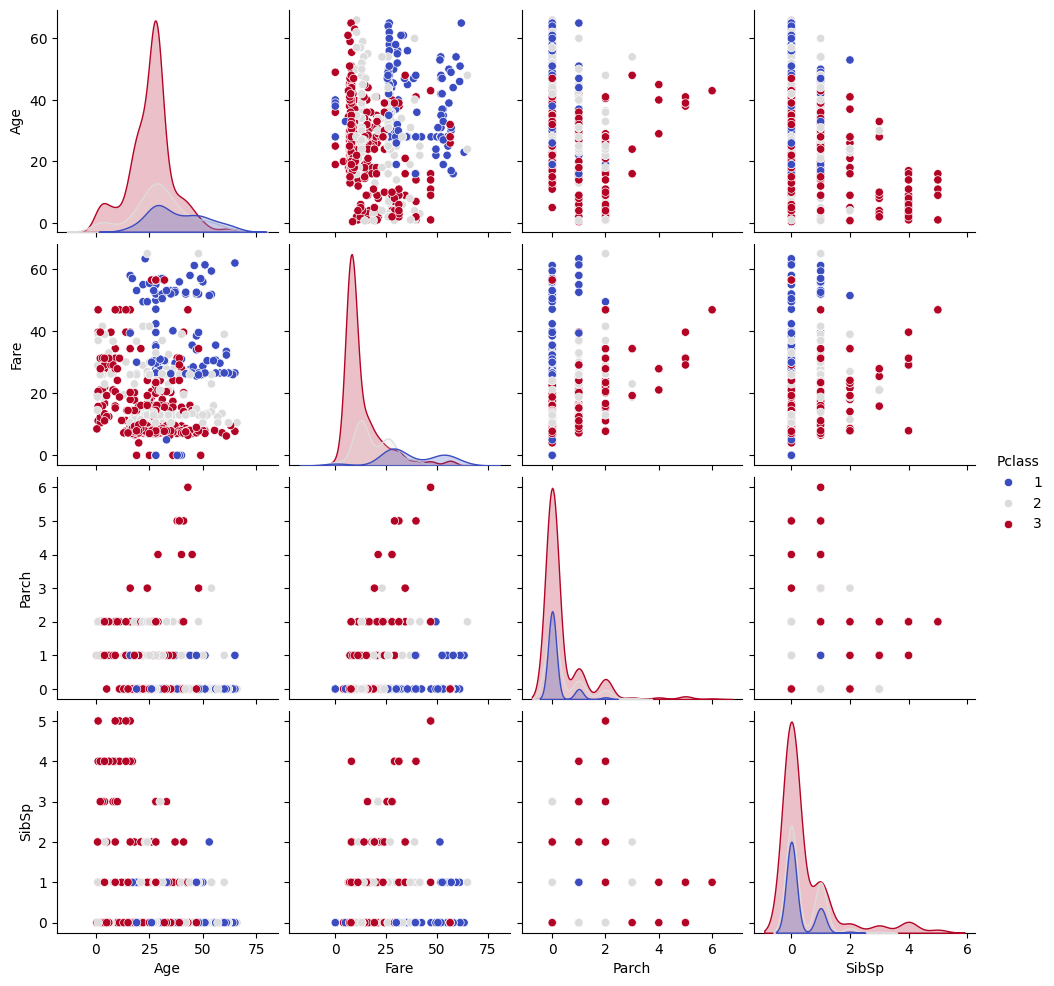

In [145]:
sns.pairplot(df, vars=numerical_columns, hue="Pclass", palette="coolwarm")
plt.show()



### 1. Age vs. Fare
- First-class passengers generally paid higher fares and were spread across all age groups.  
- Third-class passengers mostly had low fares, with a higher concentration of younger individuals.  

### 2. Age vs. SibSp & Age vs. Parch  
- Younger passengers, especially in third class, were more likely to travel with family (higher SibSp/Parch values).  
- Older first-class passengers were more likely to travel alone, with low SibSp/Parch values.  

### 3. Fare vs. SibSp & Fare vs. Parch 
- Passengers with higher fares (first class) typically had smaller family sizes.  
- Third-class passengers had lower fares and were more likely to travel with larger families.  

### 4. SibSp vs. Parch  
- Strong positive correlation: Passengers traveling with siblings/spouses often had parents/children as well.  
- Large family groups were more common in third class, while smaller families or solo travelers were prevalent in first class.  


---

## **Pairplot (Sex as Hue)**

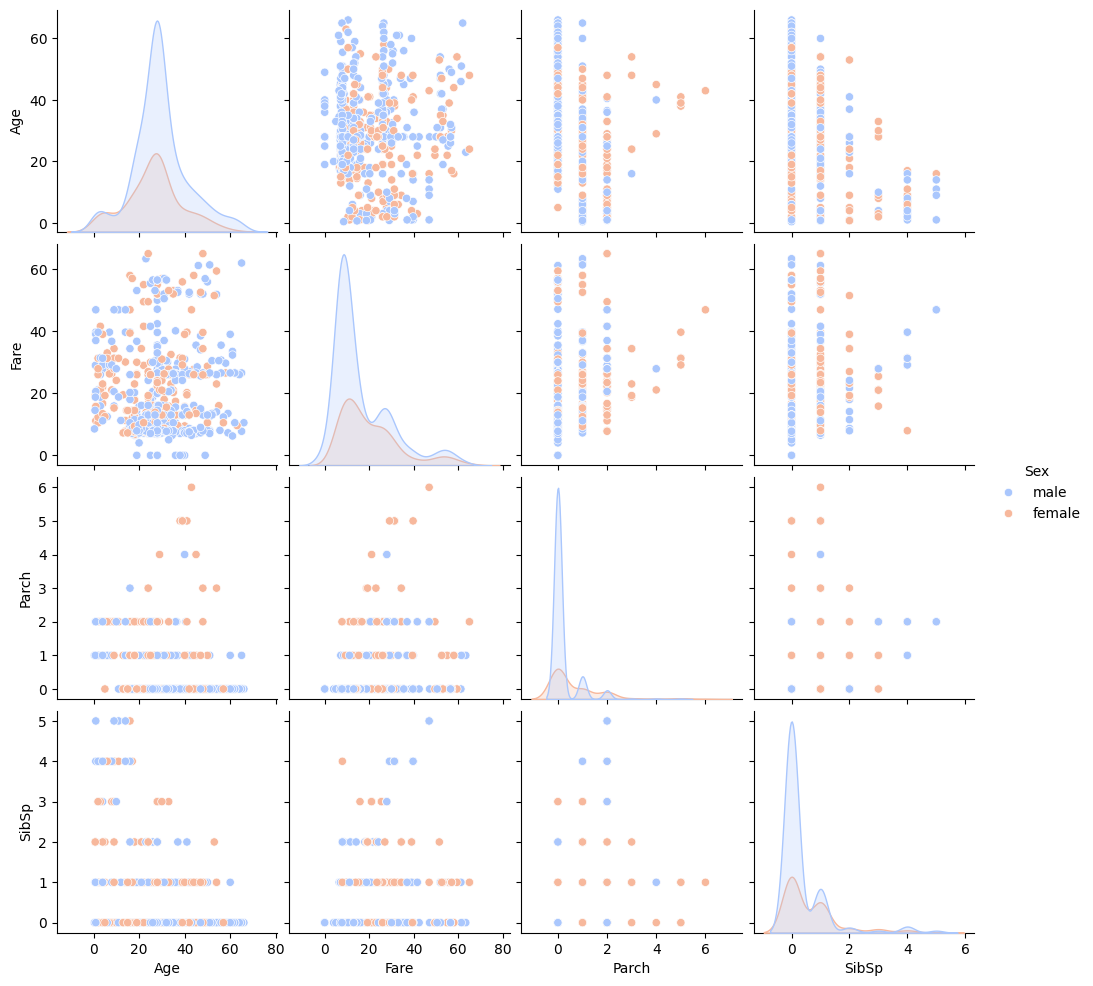

In [146]:
sns.pairplot(df, vars=numerical_columns, hue="Sex", palette="coolwarm")
plt.show()

### 1. Age vs. Fare 
- Female passengers were more evenly distributed across fare ranges, with many in the higher fare category (likely first-class passengers).  
- Male passengers were more concentrated in the lower fare range, indicating a higher proportion in third class.  

### 2. Age vs. SibSp & Age vs. Parch  
- Younger females had higher SibSp and Parch values, indicating they were more likely to travel with family.  
- Older males were more likely to travel alone, with lower SibSp/Parch values.  

### 3. Fare vs. SibSp & Fare vs. Parch  
- Passengers paying higher fares (likely first-class females) had smaller family sizes.  
- Males, especially in third class, were more likely to have larger family sizes with higher SibSp/Parch values.  

### 4. SibSp vs. Parch  
- Passengers traveling with siblings/spouses often had parents/children as well.  
- Large families were more common among female passengers, while males were more likely to travel alone or in smaller groups.  


---

## **Pairplot (Embarked as Hue)**

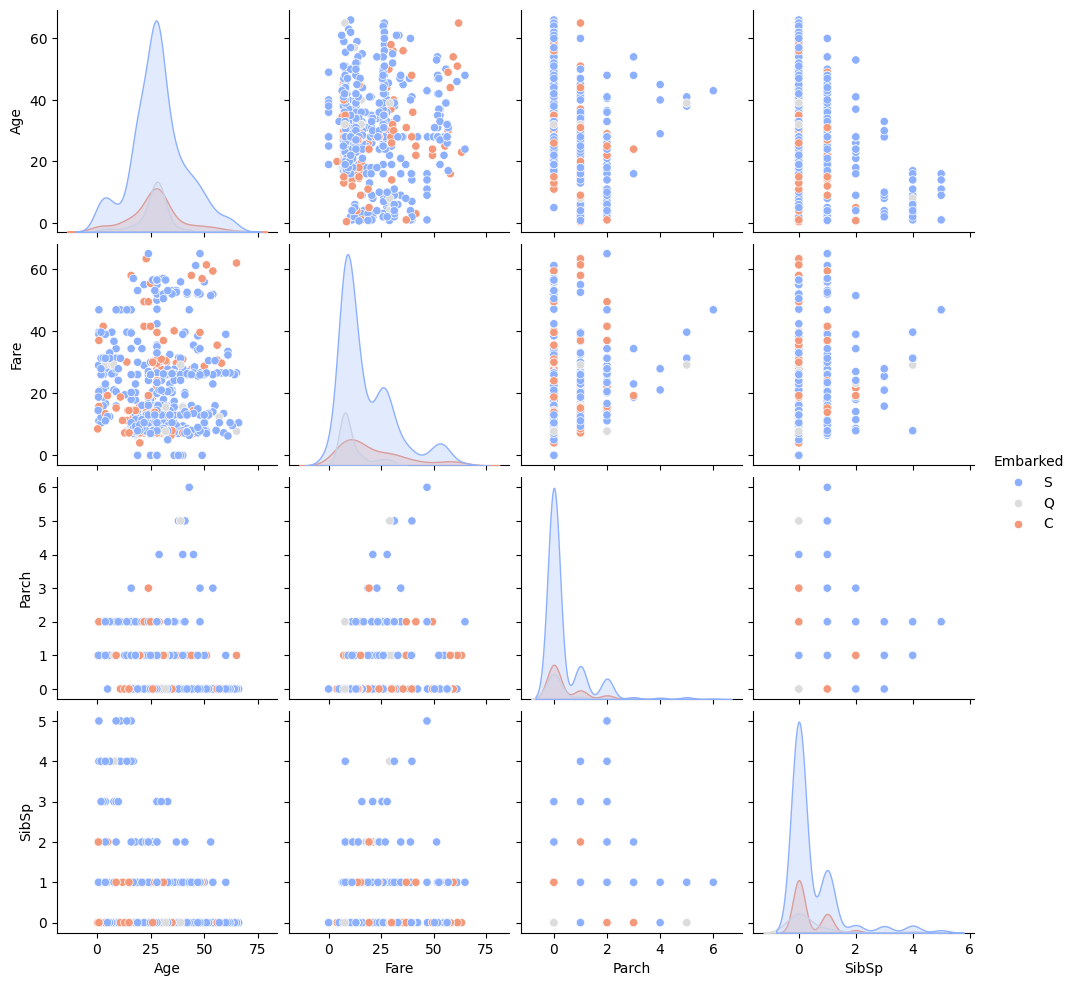

In [147]:
sns.pairplot(df, vars=numerical_columns, hue="Embarked", palette="coolwarm")
plt.show()

### 1. Age vs. Fare  
- Passengers embarking from Cherbourg (C) had a wider spread of fares, with many paying higher fares (likely first-class passengers).  
- Southampton (S) had the highest concentration of low-fare passengers, indicating more third-class travelers.  
- Queenstown (Q) passengers mostly paid low fares and were younger on average.  

### 2. Age vs. SibSp & Age vs. Parch  
- Queenstown (Q) passengers had more young travelers with family (higher SibSp/Parch values).  
- Cherbourg (C) passengers were more evenly distributed, with both solo travelers and families.  
- Southampton (S) had a mix but included many older solo travelers.  

### 3. Fare vs. SibSp & Fare vs. Parch  
- Higher fares (mostly from Cherbourg) were associated with smaller family sizes, indicating first-class passengers often traveled alone or in smaller groups.  
- Queenstown passengers, who paid lower fares, were more likely to have larger families.  
- Southampton passengers showed a wider distribution of SibSp/Parch values across fare ranges.  

### 4. SibSp vs. Parch  
- Strong positive correlation: Passengers with siblings/spouses often had parents/children as well.  
- Larger families were more common among Queenstown (Q) passengers, while smaller families and solo travelers were more frequent among Cherbourg (C) passengers.  


---

## **Correlation Matrix and Heatmap**

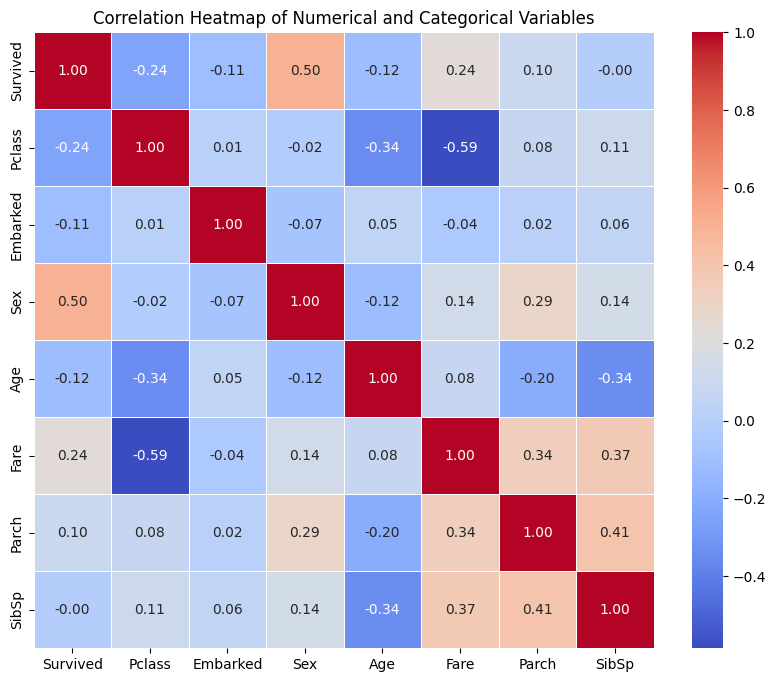

In [148]:
df_encoded = df.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
df_encoded["Embarked"] = df_encoded["Embarked"].map({"C": 0, "Q": 1, "S": 2})

corr_matrix_cat = df_encoded[["Survived", "Pclass", "Embarked", "Sex"] + numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical and Categorical Variables")
plt.show()

### 1. Correlation Between Numerical Variables  
- Fare and Pclass show a strong negative correlation. Higher-class passengers paid significantly more for tickets, while third-class passengers paid the least.  
- SibSp and Parch have a strong positive correlation, indicating that passengers with siblings/spouses onboard also often had parents/children with them.  
- Age and Parch show a weak negative correlation, suggesting that younger passengers were more likely to travel with parents.  

### 2. Correlation Between Categorical and Numerical Variables  
- Survived and Fare show a moderate positive correlation. Passengers who paid higher fares had better survival chances, likely due to first-class accommodations.  
- Survived and Pclass show a negative correlation, reinforcing that first-class passengers had the highest survival rate while third-class passengers had the lowest.  
- Survived and Age have a weak negative correlation, suggesting that younger passengers had slightly better survival rates, particularly children.  

### 3. Correlation Between Categorical Variables   
- Sex and Survived show a strong correlation, with females having a significantly higher survival rate than males.   


---
# Other Visualisations for Multivariate Analysis:

**Scatter plot**

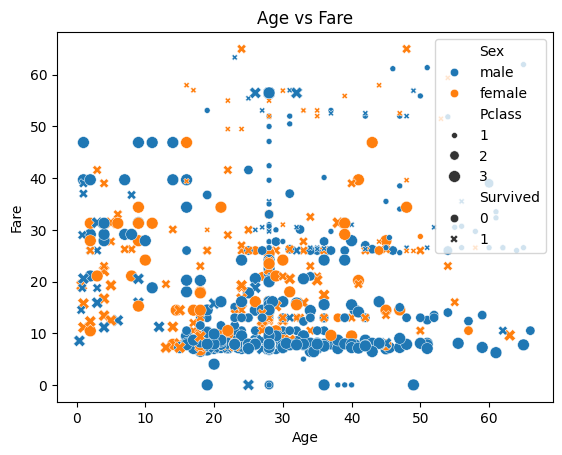

In [149]:
sns.scatterplot(x="Age", y="Fare", data=df, hue="Sex", style="Survived", size="Pclass")
plt.title("Age vs Fare")
plt.show()

**Bar plot**

<Axes: xlabel='Pclass', ylabel='Fare'>

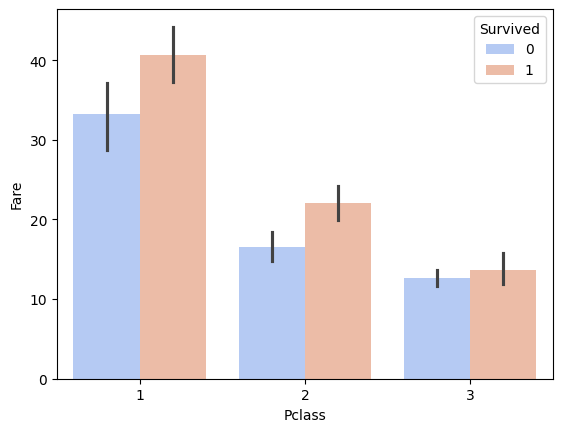

In [150]:
sns.barplot(x="Pclass", y="Fare", data=df, hue="Survived", palette="coolwarm")

### 1. Fare Distribution Across Classes  
- First-class passengers (Pclass = 1) paid significantly higher fares on average compared to second and third-class passengers.  
- Third-class passengers (Pclass = 3) had the lowest fares, reinforcing the economic gap between classes.  

### 2. Survival Trends Within Each Class  
- In all classes, survivors (hue) generally had higher average fares than non-survivors.  
- The gap between survivors and non-survivors was more noticeable in first and second class, suggesting that higher-paying passengers had better survival chances.  
- In third class, the difference in fare between survivors and non-survivors was smaller, indicating that survival may have been more influenced by other factors such as location on the ship or access to lifeboats.  



---
**Box plot** 

<Axes: xlabel='Sex', ylabel='Age'>

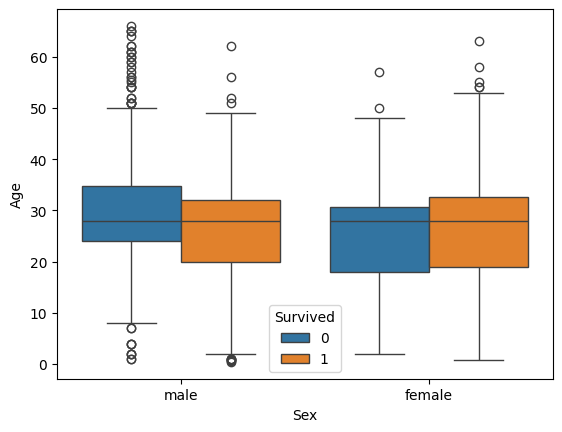

In [151]:
sns.boxplot(x="Sex", y="Age", data=df, hue="Survived")

### 1. Age Distribution by Sex  
- Males had a wider age range, with a higher concentration of middle-aged passengers.  
- Females had a slightly lower median age, with a higher concentration of younger individuals.  

### 2. Survival Trends Within Each Sex  
- Among females, survivors were present across all age groups, with a higher survival rate overall.  
- Among males, non-survivors were more dominant, especially in the middle-aged and older groups.  
- Younger males had a slightly better chance of survival compared to older males.  
   
